### BADASS Analysis - can we tell the difference between mannose, fructose, glucose, maltose and glucosamine?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Sugar data

In [3]:
sugar_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10', 'repeat_11', 'repeat_12', 'repeat_13', 'repeat_14', 'repeat_15',
                  'repeat_16', 'repeat_17', 'repeat_18', 'repeat_19', 'repeat_20'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Standard_array/Sugars/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Standard_array/Sugars/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Standard_array/Sugars/?y


Locate xlsx files

In [4]:
sugar_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [5]:
sugar_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/a-gal_a-glu_b-gal_b-glu_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/fru_glu_mal_man_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/acetilglu_gal_gluhcl_xyl_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/acetilglu_gal_gluhcl_xyl_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/fru_glu_mal_man_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/a-gal_a-glu_b-gal_b-glu_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/a-gal_a-glu_b-gal_b-glu_repeat_19.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/acetilglu_gal_gluhcl_xyl_repeat_19.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/fru_glu_mal_man_repeat_19.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/fru_glu_mal_man_repeat_20.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/acetilglu_gal_gluhcl_xyl_repeat_20.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/a-gal_a-glu_b-gal_b-glu_repeat_20.xlsx


Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [6]:
sugar_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: mal, 8 (flagged readings = GRP63: 0.19897314122952303, 24K: 0.29576914601025717) 
 Outlier excluded from final output dataset: fru, 8 (flagged readings = GRP51: 0.2648362936535945, GRP52: 0.13277774405270648, GRP63: 0.44088965859530593, GRP80: 0.40262054434276884, 24D: 0.32920683317685917, 24K: 0.5108013491951114, 17K: 0.6035852071844209) 
 Outlier excluded from final output dataset: gluhcl, 2 (flagged readings = GRP46: 0.17476258673804612) 
 Outlier excluded from final output dataset: b-glu, 5 (flagged readings = GRP22: 0.2903340223877868) 
 Outlier excluded from final output dataset: glu, 8 (flagged readings = GRP63: 0.47368051944584666, GRP80: 0.39458870953589364, 24K: 0.5126683776953226, 17K: 0.46959749833782394) 
 Outlier excluded from final output dataset: a-gal, 5 (flagged readings = GRP46: 0.5948016045143236) 
 Outlier excluded from final output dataset: a-gal, 1 (flagged readings = Hex: 0.350322026701514) 
 Outlier excluded from fin

In [7]:
sugar_fluor_data.ml_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,1.006916,1.049553,0.989048,0.992540,0.996426,1.035119,0.941960,0.955559,1.030651,1.017196,1.007881,0.997831,0.962611,0.952645,xyl
1,0.968052,1.015837,0.986726,0.986919,1.017776,0.956922,1.013281,0.986603,0.984784,1.033400,0.985406,0.992458,0.960634,0.999660,xyl
2,0.998994,1.038938,0.986370,0.995560,1.046103,0.986418,0.987574,0.982142,1.087830,0.964193,1.020265,1.014667,1.023237,1.019849,xyl
3,1.021008,1.004822,0.983983,0.988496,0.972524,0.912017,1.028916,0.988515,1.050805,1.009780,0.979146,0.983240,0.982742,1.004965,xyl
4,1.050376,0.997455,0.984676,1.026172,1.014523,0.935025,0.996525,0.947136,1.028420,1.033120,1.005835,1.019885,0.996385,1.007829,xyl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.963210,1.078969,1.007844,0.942880,0.999753,1.003963,0.939715,0.885692,0.990886,0.961965,0.978926,0.989200,1.007995,1.085669,a-glu
224,1.037905,0.992641,1.044556,0.997614,0.978967,1.007669,0.969025,1.009624,1.127019,1.077978,1.018143,0.990716,1.046084,1.069231,a-glu
225,0.946337,0.924702,1.055968,0.981930,1.004697,1.001136,0.972332,0.974319,1.050016,1.011479,1.047025,1.023338,1.037896,1.095597,a-glu
226,0.974427,0.952770,1.021100,0.987091,0.999198,0.994989,0.984027,1.002027,1.001643,0.971294,0.981440,1.005521,0.956830,0.940102,a-glu


Makes sub-dataframe of 5 analytes we are interested in distinguishing (too few data points to attempt to distinguish all 12 different sugars tested on the standard array)

In [8]:
sub_indices = [i for i in range(sugar_fluor_data.ml_fluor_data.shape[0])
               if sugar_fluor_data.ml_fluor_data['Analyte'][i] in ['man', 'fru', 'glu', 'mal', 'gluhcl']]
sub_sugar_fluor_data = copy.deepcopy(sugar_fluor_data.ml_fluor_data).iloc[sub_indices].reset_index(drop=True)

In [9]:
sub_sugar_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,1.078913,0.978700,1.060827,1.045100,1.066824,1.023462,1.020302,1.049203,1.198933,1.068160,1.042646,1.041907,0.980948,0.999107,mal
1,1.009969,1.114858,0.996750,1.028444,1.030986,1.048664,1.043316,1.031504,0.983968,1.023372,1.028631,1.041613,1.026476,1.014690,mal
2,0.973681,0.919515,0.992881,0.999536,1.026951,1.197619,0.984385,0.910099,0.906685,0.943666,1.005723,1.003077,0.989207,0.978341,mal
3,1.045676,1.089586,1.010536,1.019044,1.033622,1.020068,1.033900,1.015789,0.929787,0.997890,1.020866,1.037616,0.990706,1.002500,mal
4,1.053350,1.123650,0.991263,0.988054,1.032175,1.023138,1.000278,0.935561,1.055990,1.047997,1.028224,1.010957,1.024464,0.998431,mal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.994037,1.004175,0.972105,0.996479,1.051137,1.006452,0.966072,0.999005,1.008446,1.036126,1.046517,1.032214,0.980080,1.010033,man
91,0.977657,1.013260,0.986980,0.979764,1.007786,1.040842,1.006778,0.928993,0.984338,1.035363,0.999719,1.019071,1.023188,1.165955,man
92,1.026470,0.974328,1.017730,0.973080,1.009943,0.955975,0.979966,0.994797,1.017393,1.055292,0.920144,0.987096,1.032200,1.121649,man
93,0.950442,1.009304,1.001326,0.990778,0.987783,0.869275,0.913712,0.962441,1.023355,0.965887,1.004148,0.975510,0.979622,1.026585,man


Generates "representative" fingerprint for each class (by calculating the median value for each feature)

mal


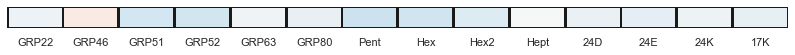

fru


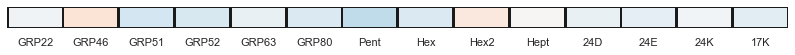

gluhcl


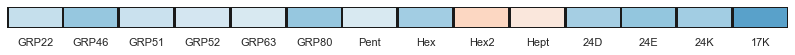

glu


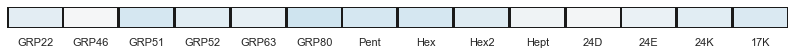

man


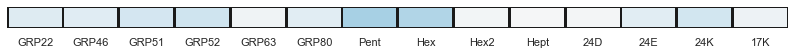

In [10]:
classes = []
for class_name in sub_sugar_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
sub_sugar_fluor_data_x_val = sub_sugar_fluor_data.drop(['Analyte'], axis=1)
vmin = sub_sugar_fluor_data_x_val.values.min()
vmax = sub_sugar_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(sub_sugar_fluor_data.shape[0])
                     if sub_sugar_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(sub_sugar_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(14,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=sub_sugar_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Generates box plots to compare the distribution of values for each class across the 14 features

man


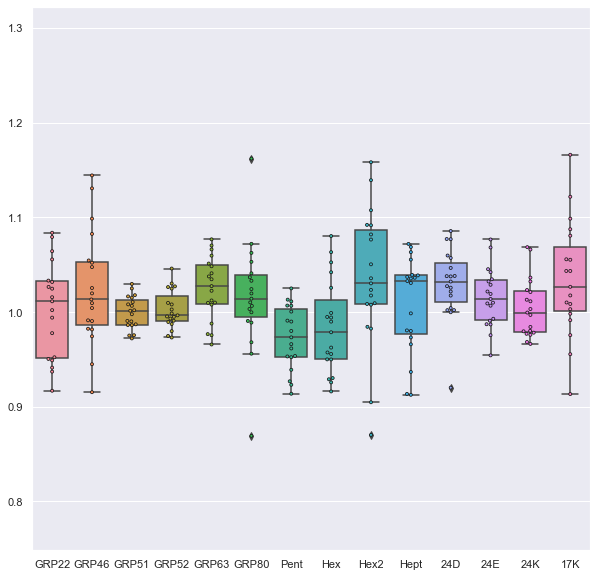

glu


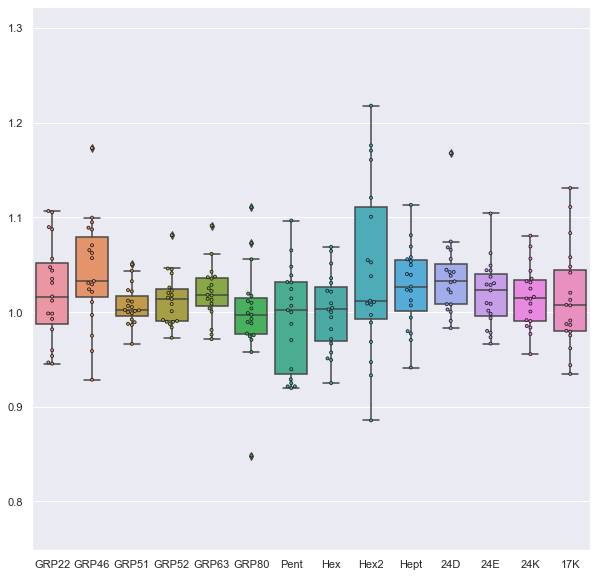

fru


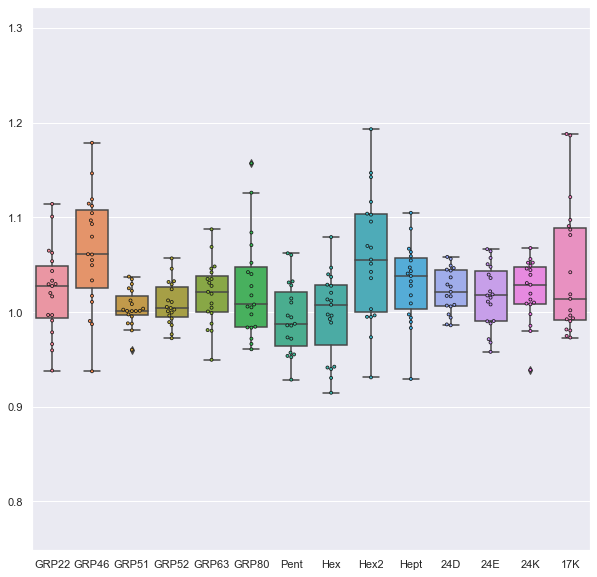

mal


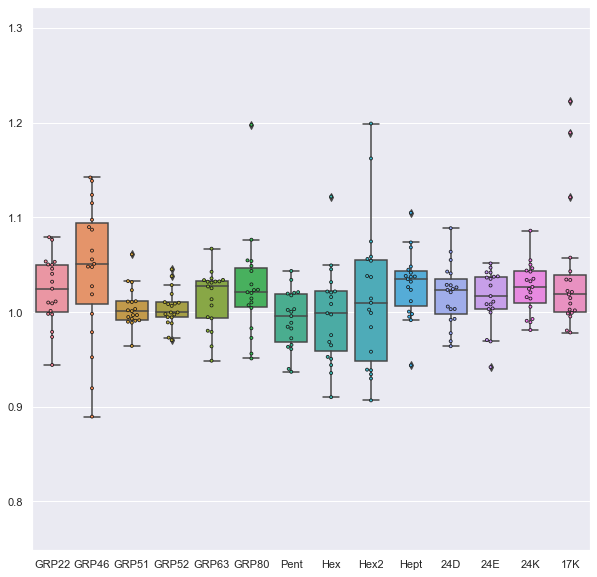

gluhcl


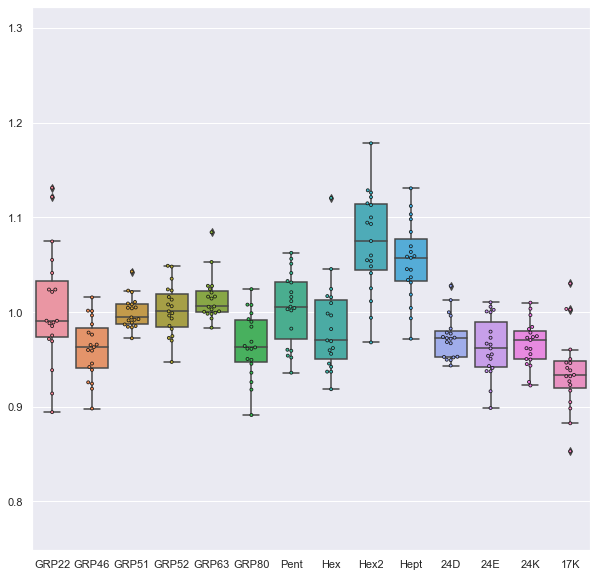

In [11]:
ymin = sub_sugar_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = sub_sugar_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

man_indices = [int(i) for i in range(sub_sugar_fluor_data.shape[0])
               if sub_sugar_fluor_data['Analyte'][i] == 'man']
fru_indices = [int(i) for i in range(sub_sugar_fluor_data.shape[0])
               if sub_sugar_fluor_data['Analyte'][i] == 'fru']
glu_indices = [int(i) for i in range(sub_sugar_fluor_data.shape[0])
               if sub_sugar_fluor_data['Analyte'][i] == 'glu']
mal_indices = [int(i) for i in range(sub_sugar_fluor_data.shape[0])
               if sub_sugar_fluor_data['Analyte'][i] == 'mal']
gluhcl_indices = [int(i) for i in range(sub_sugar_fluor_data.shape[0])
                  if sub_sugar_fluor_data['Analyte'][i] == 'gluhcl']

sns.set(rc={'figure.figsize':(10,10)})
print('man')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=sub_sugar_fluor_data.iloc[man_indices])
sns.swarmplot(data=sub_sugar_fluor_data.iloc[man_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('glu')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=sub_sugar_fluor_data.iloc[glu_indices])
sns.swarmplot(data=sub_sugar_fluor_data.iloc[glu_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('fru')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=sub_sugar_fluor_data.iloc[fru_indices])
sns.swarmplot(data=sub_sugar_fluor_data.iloc[fru_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('mal')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=sub_sugar_fluor_data.iloc[mal_indices])
sns.swarmplot(data=sub_sugar_fluor_data.iloc[mal_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('gluhcl')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=sub_sugar_fluor_data.iloc[gluhcl_indices])
sns.swarmplot(data=sub_sugar_fluor_data.iloc[gluhcl_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

#### Run machine learning

In [12]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

First split the data into a training and test set

In [13]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/Sugars/'
                'Sugars_ML_results/', fluor_data=sub_sugar_fluor_data
)

In [14]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

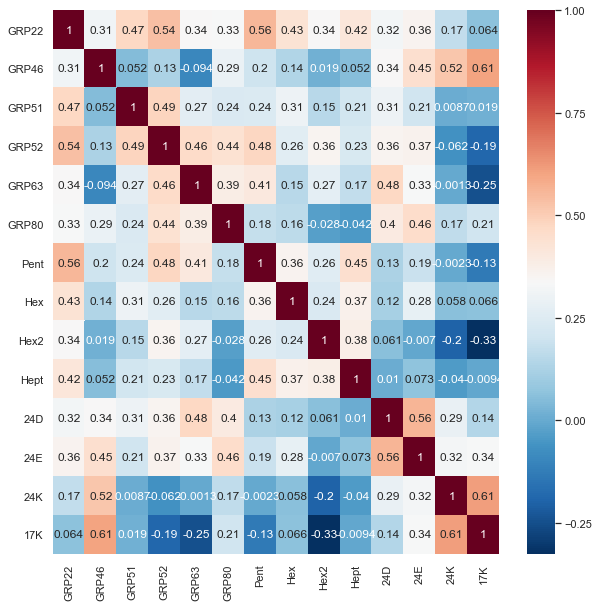

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
GRP22,1.000000,0.312648,0.474904,0.537292,0.338733,0.332721,0.557918,0.434912,0.337914,0.416764,0.316392,0.359065,0.172474,0.063578
GRP46,0.312648,1.000000,0.051652,0.129199,-0.093659,0.290635,0.202030,0.137304,0.019177,0.052436,0.340775,0.450952,0.520955,0.605585
GRP51,0.474904,0.051652,1.000000,0.485778,0.265929,0.237528,0.241559,0.305375,0.154507,0.209756,0.305473,0.205515,0.008749,0.018953
GRP52,0.537292,0.129199,0.485778,1.000000,0.463788,0.435722,0.479703,0.259658,0.355277,0.230613,0.355851,0.366965,-0.062304,-0.188060
GRP63,0.338733,-0.093659,0.265929,0.463788,1.000000,0.385148,0.407671,0.153807,0.271417,0.171962,0.475294,0.332853,-0.001316,-0.245703
GRP80,0.332721,0.290635,0.237528,0.435722,0.385148,1.000000,0.180277,0.160988,-0.027898,-0.041601,0.396025,0.459197,0.170801,0.205319
Pent,0.557918,0.202030,0.241559,0.479703,0.407671,0.180277,1.000000,0.359966,0.258553,0.448530,0.127142,0.189012,-0.002338,-0.131453
Hex,0.434912,0.137304,0.305375,0.259658,0.153807,0.160988,0.359966,1.000000,0.238018,0.371375,0.119037,0.283273,0.058483,0.066251
Hex2,0.337914,0.019177,0.154507,0.355277,0.271417,-0.027898,0.258553,0.238018,1.000000,0.380053,0.061016,-0.007013,-0.201302,-0.325854
Hept,0.416764,0.052436,0.209756,0.230613,0.171962,-0.041601,0.448530,0.371375,0.380053,1.000000,0.010260,0.072578,-0.040216,-0.009351


In [15]:
ml.calc_feature_correlations(train_data=ml.fluor_data)

- Measure the relative importances of the initial 14 features

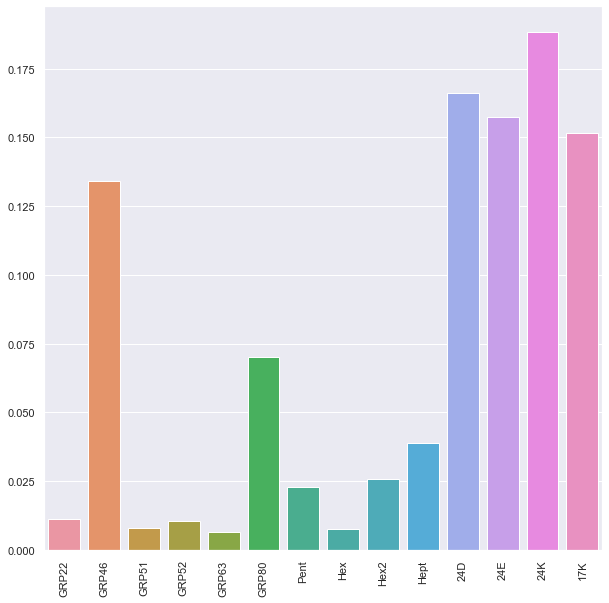

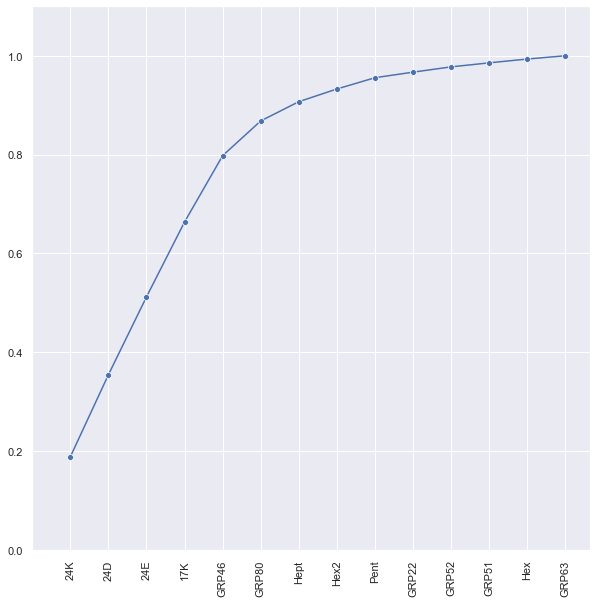

,Feature,Score
0,24K,0.188246
1,24D,0.166118
2,24E,0.157576
3,17K,0.151686
4,GRP46,0.134176
5,GRP80,0.070314
6,Hept,0.038920
7,Hex2,0.025713
8,Pent,0.022817
9,GRP22,0.011236


In [16]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

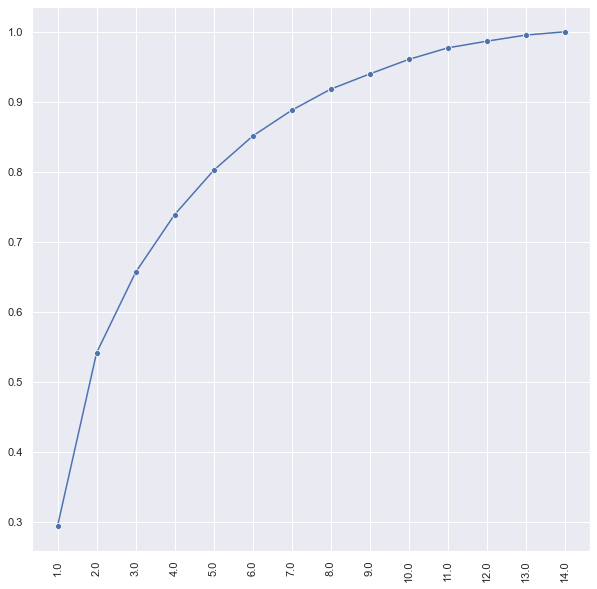

In [17]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [18]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [19]:
pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,0.189993,0.583445,0.029640,0.039933,-0.027849,0.237083,0.086722,0.122342,-0.153738,0.054179,0.172645,0.240652,0.251259,0.603431
2,0.376191,0.097439,0.089049,0.158776,0.164342,0.117850,0.260304,0.246987,0.706545,0.274536,0.088228,0.081823,-0.059355,-0.231541
3,0.195610,-0.202910,0.074902,0.159513,0.244613,0.599187,0.175854,-0.078051,-0.427766,-0.151634,0.276168,0.178876,-0.036931,-0.343550
4,0.286100,-0.314243,0.058895,-0.004220,-0.074478,-0.211983,0.238515,0.479766,-0.442138,0.482479,-0.179644,-0.092369,-0.009948,0.095855
5,0.082462,0.461976,-0.003624,0.049719,0.055912,-0.555738,0.325002,-0.253243,-0.254920,0.048893,0.216337,0.046573,0.049187,-0.420475
6,0.093165,0.289358,-0.106860,-0.067863,-0.219306,0.376881,0.290502,-0.328718,-0.049246,0.155919,-0.486298,-0.441049,-0.220191,-0.052503
7,-0.406778,0.366672,-0.107767,-0.058274,-0.105872,0.137472,-0.004990,0.673069,-0.089559,-0.175468,-0.082325,0.046413,-0.230163,-0.318126
8,0.623307,0.039676,0.048479,0.025780,-0.173298,-0.134944,-0.150469,0.168212,-0.016972,-0.639299,-0.260379,-0.096548,0.117119,-0.088850
9,0.209308,0.170135,0.088534,-0.048507,-0.288590,0.118254,-0.659512,-0.000560,-0.078496,0.364018,0.343492,-0.261462,0.003419,-0.244533


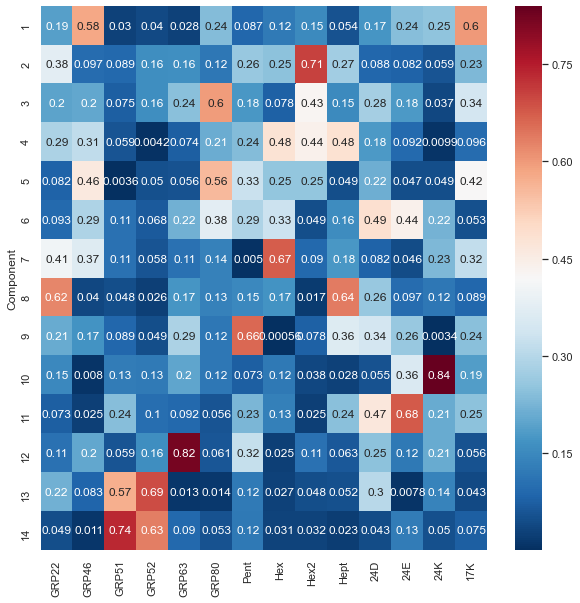

In [20]:
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Relative contribution to the different components of each barrel

In [21]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [22]:
relative_pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,0.062087,0.204432,0.012639,0.017180,0.010834,0.084908,0.028384,0.045539,0.062265,0.019661,0.053541,0.086669,0.103583,0.200732
2,0.122933,0.034141,0.037971,0.068308,0.063935,0.042207,0.085197,0.091935,0.286156,0.099628,0.027361,0.029468,0.024469,0.077022
3,0.063922,0.071097,0.031939,0.068625,0.095163,0.214591,0.057557,0.029053,0.173249,0.055027,0.085645,0.064421,0.015225,0.114282
4,0.093493,0.110107,0.025113,0.001816,0.028974,0.075919,0.078066,0.178581,0.179070,0.175089,0.055711,0.033266,0.004101,0.031886
5,0.026947,0.161871,0.001545,0.021390,0.021752,0.199031,0.106373,0.094263,0.103245,0.017743,0.067090,0.016773,0.020278,0.139871
6,0.030445,0.101388,0.045566,0.029196,0.085317,0.134975,0.095081,0.122357,0.019945,0.056582,0.150811,0.158841,0.090775,0.017465
7,0.132929,0.128478,0.045953,0.025070,0.041188,0.049234,0.001633,0.250533,0.036272,0.063677,0.025531,0.016715,0.094886,0.105825
8,0.203687,0.013902,0.020672,0.011091,0.067419,0.048328,0.049248,0.062613,0.006874,0.231998,0.080749,0.034771,0.048283,0.029556
9,0.068399,0.059613,0.037752,0.020869,0.112271,0.042351,0.215857,0.000209,0.031792,0.132100,0.106524,0.094164,0.001410,0.081344


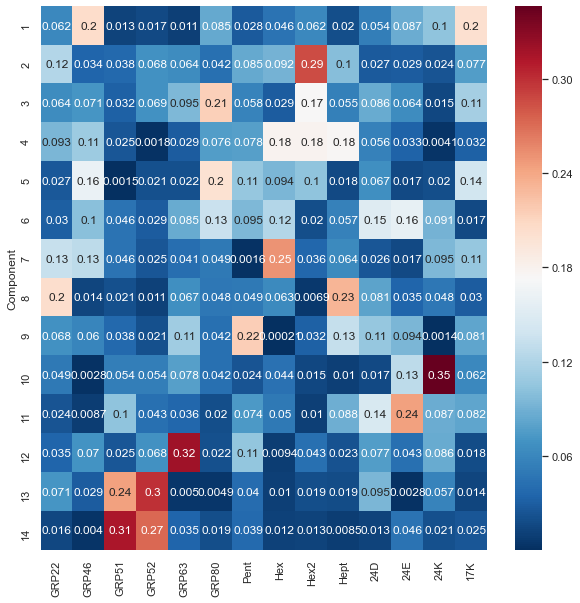

In [23]:
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Scatter plots of data transformed to PCA dimensions

In [24]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    random.shuffle(extra_colours)
    colours += extra_colours
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

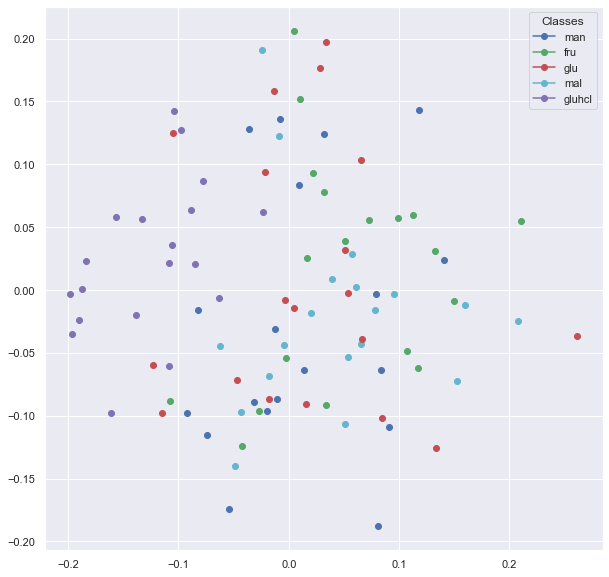

In [25]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['man', 'fru', 'glu', 'mal', 'gluhcl'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

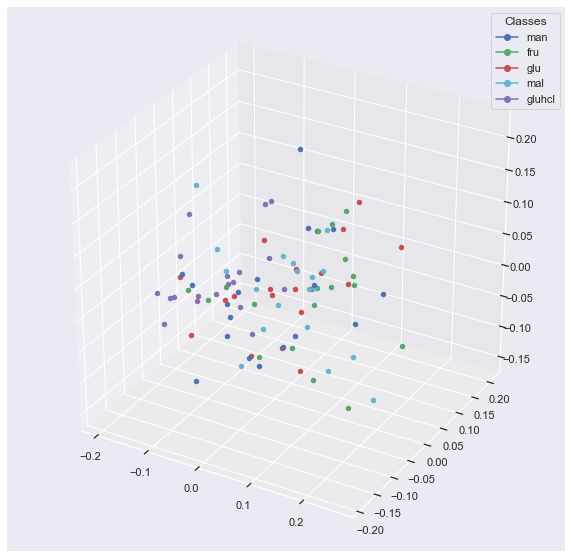

In [26]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['man', 'fru', 'glu', 'mal', 'gluhcl'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

~95% of the variation in the data can be accounted for with 9 features. Since there are only 14 features, in this case I won't use PCA to reduce the number of features. However, I will still run PCA in order to transform the 14 features so that they are independent of each other.

In [27]:
n_components = 14

Are the classes balanced?

In [28]:
analytes = sub_sugar_fluor_data['Analyte'].tolist()
print('man: {}'.format(analytes.count('man')))
print('mal: {}'.format(analytes.count('mal')))
print('fru: {}'.format(analytes.count('fru')))
print('glu: {}'.format(analytes.count('glu')))
print('gluhcl: {}'.format(analytes.count('gluhcl')))

man: 19
mal: 19
fru: 19
glu: 19
gluhcl: 19


Classes are balanced, so no need to include balancing step in spot check.

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- transformation to 14 orthogonal dimensions using PCA
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [29]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
random_forest = RandomForestClassifier(n_jobs=-1)
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)  # Actual number of x samples will be
    # different owing to oversampling, but don't want to hard code this selection into the pipeline, so for now
    # this estimate will do
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 0.31622776601683794}
Best score: 0.3033333333333333






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 0.31622776601683794}
Best score: 0.3033333333333333
All parameter combinations tested:
1 {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 31622.776601683792} 0.289
2 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 10.0} nan
3 {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.04419417382415922}
Best score: 0.3675






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 0.04419417382415922}
Best score: 0.3675
All parameter combinations tested:
1 {'LinearSVC__C': 16384.0} 0.301
2 {'LinearSVC__C': 11.313708498984761} 0.301
3 {'LinearSVC__C': 8.0} 0.301
4 {'LinearSVC__C': 2.0} 0.327
5 {'LinearSVC__C': 0.08838834764831845} 0.354
6 {'LinearSVC__C': 256.0} 0.301
7 {'LinearSVC__C': 0.5} 0.327
8 {'LinearSVC__C': 11585.237502960395} 0.301
9 {'LinearSVC__C': 0.125} 0.327
10 {'LinearSVC__C': 90.50966799187809} 0.301
11 {'LinearSVC__C': 64.0} 0.301
12 {'LinearSVC__C': 0.1767766952966369} 0.327
13 {'LinearSVC__C': 4096.0} 0.301
14 {'LinearSVC__C': 362.03867196751236} 0.301
15 {'LinearSVC__C': 2048.0} 0.301
16 {'LinearSVC__C': 45.254833995939045} 0.301
17 {'LinearSVC__C': 8192.0} 0.301
18 {'LinearSVC__C': 181.01933598375618} 0.301
19 {'LinearSVC__C': 16.0} 0.301
20 {'LinearSVC__C':

In [30]:
score_df

,Algorithm,Resampling_method,Best_params,Best_accuracy_score,Mean_accuracy_score,Std_dev_accuracy_score
0,LogisticRegression,no_balancing,"{'LogisticRegression__solver': 'lbfgs', 'Logis...",0.303333,0.272304,0.050971
1,KNeighborsClassifier,no_balancing,"{'KNeighborsClassifier__weights': 'uniform', '...",0.355000,0.298033,0.067377
2,GaussianNB,no_balancing,{},0.315000,0.315000,0.073106
3,LinearSVC,no_balancing,{'LinearSVC__C': 0.04419417382415922},0.367500,0.317367,0.068993
4,SVC,no_balancing,"{'SVC__gamma': 8.631674575031098e-05, 'SVC__C'...",0.342500,0.250967,0.060064


So, from this spot check, a **support vector classifier with linear kernel** does a good job.

So, run hyperparameter optimisation for LinearSVC.

In [41]:
fixed_params = ml.define_fixed_model_params(clf=LinearSVC())
random_tuned_params = ml.define_tuned_model_params(clf=LinearSVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.0625}
Best score: 0.3416666666666666


In [42]:
grid_tuned_params = {'C': np.linspace(0.001, 1, 1000)}

svc_grid_search = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.006}
Best score: 0.34249999999999997


### So, optimal hyperparameter combination:
- C = 0.006

Model cross-validation score: [0.25       0.4        0.2        0.4        0.26666667]
accuracy_score: 0.5263157894736842
recall_score: 0.47000000000000003
precision_score: 0.5028571428571429
f1_score: 0.4238095238095238
cohen_kappa_score: 0.3978873239436621
None


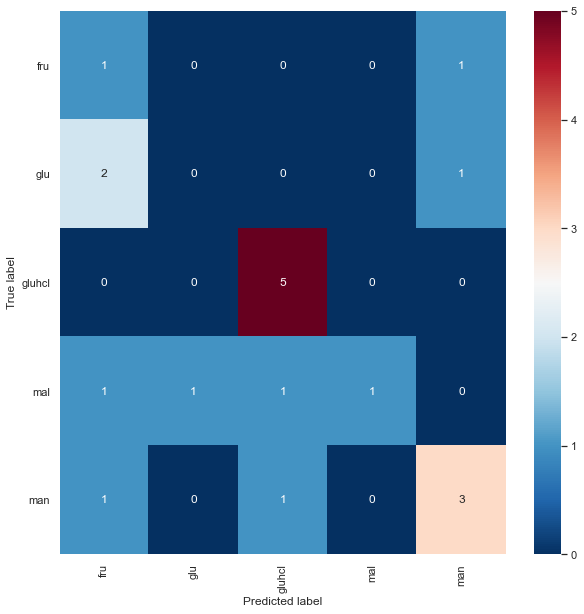

true


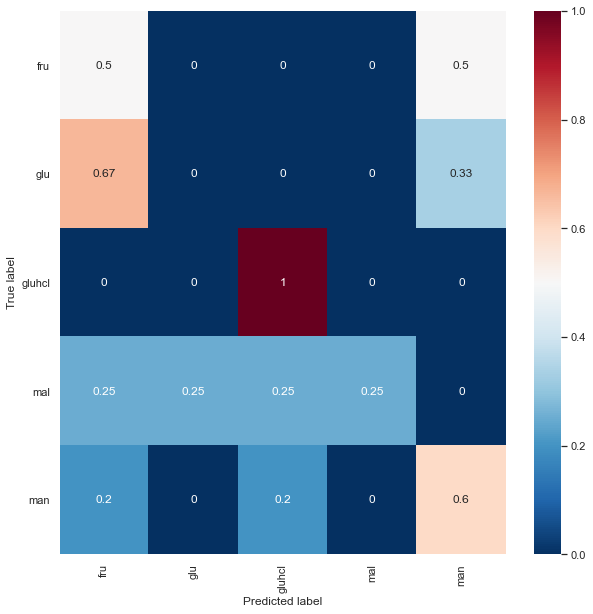

pred


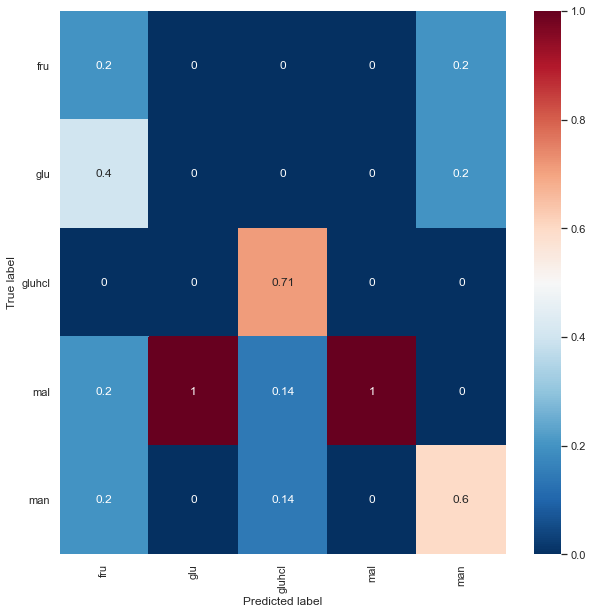

In [43]:
final_params = {'C': 0.006}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

The performance of the model is inflated by its ability to distinguish gluhcl - on the other four sugars, the model does little better than random guess (except perhaps mannose). Therefore, the scores associated with this model are an overestimate of its performance.

How well does the trained classifier predict the different classes?

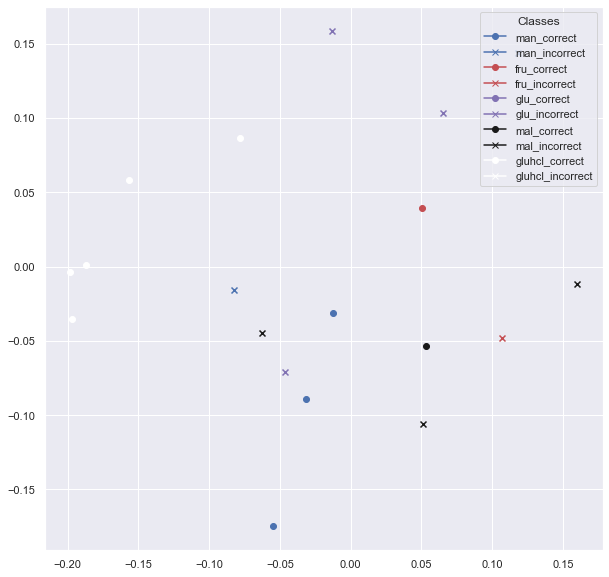

In [44]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['man_correct', 'man_incorrect', 'fru_correct', 'fru_incorrect', 'glu_correct', 'glu_incorrect',
                'mal_correct', 'mal_incorrect', 'gluhcl_correct', 'gluhcl_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)